# Erstellung von Tabellen mit Hilfe von Python und `matplotlib`

In diesem Jupyter Notebook erfahren Sie, wie Sie Tabellen erzeugen können, die für Ihre Messdaten geeignet sind. Als Basis wird das Paket `matplotlib` verwendet.

---

## Aufbau der `matplotlib` Tabellen-Syntax

Das `matplotlib`-Paket wurde ursprünglich für die Erstellung von Diagrammen erstellt. Die Nutzung zur Erstellung von Tabellen ist eine Beugung der Funktionen, die jedoch zuverlässig und hinreichend simpel funktioniert. Wie immer bei Tabellen werden einige Angaben benötigt:

1. Daten
2. Überschriften bzw. Kategorien
3. Aufbau von Zeilen und Spalten

Mit diesen Informationen können Sie eine Tabelle erstellen.

Wir nehmen folgendes Beispiel:

Sie führen eine Messung von Spannung und Stromstärke durch. Ihre gemessenden Werte(paare) sind:

- 3,45 V; 2 mA
- 3,78 V; 2,1 mA
- 4,1 V; 2,5 mA

Prinzipiell gilt in Python, dass eine Dezimaltrennung durch einen Punkt `.` erfolgt, nicht durch Kommata. Außerdem sollten **Werte** und **Einheiten** getrennt voneinander notiert werden. Sie können in Python Einheiten einfach in Kommentaren `#` vermerken.

In [1]:
u1 = 3.45 # V
i1 = 2 # mA
u2 = 3.78 # V
i2 = 2.1 # mA
u3 = 4.1 # V
i3 = 2.5 # mA

Wenn Sie Ihre Werte jedoch so notieren, werden Sie als Tupel, also in Form von Vektoren abgespeichert. Außerdem müssen Sie alle Variablen einzeln abrufen, um auf die Daten wieder zuzugreifen, was umständlich ist.

Alternativ können Sie Ihre Messungen je nach Messung abspeichern, dies erzeugt jedoch wiederum Tupel. Solange Sie keine Berechnungen mit den Werten durchführen müssen, ist das kein Problem. Jedoch können mit Tupeln keine klassischen Berechnungen durchgeführt werden, wie zum Beispiel die Berechnung der Leistung nach $P=U\cdot I$.

> Bedenken Sie, dass Werte voneinander mit Kommata `,` getrennt werden.

In [2]:
m1 = 3.45, 2 # V, mA
m2 = 3.78, 2.1 # V, mA
m3 = 4.1, 2.5 # V, mA

> Empfohlen wird die Notation der Messdaten je nach Messgröße, also eine Variable für die Spannung $U$ und eine für die Stromstärke $I$, da dies die Erstellung von Tabellen deutlich vereinfacht.

In [47]:
u = 3.45, 3.78, 4.1
i = 2, 2.1, 2.5

Notieren Sie Ihre Messwerte so, ist die Erstellung von Tabellen einfach, jedoch die Berechnung der Leistung kompliziert. Daher empfehlen sich `numpy`-Arrays. Um diese nutzen zu können, benötigen Sie das entsprechende Paket, welches zunächst importiert werden muss mit dem Befehl
```python
import numpy as np
```
Um die Arrays zu bilden, wird der Befehl
```python
Variable = np.array([Wert1, Wert2, etc.], dtype=float)
```
verwendet. Die Werte kommen also in eine eckige Klammer `[]`, am Ende kann noch der Datentyp mit `dtype` festgelegt werden. Für Messwerte bieten sich `float` (Dezimalzahlen) und `int` (integer, ganze Zahlen) an.

In [46]:
import numpy as np
u_1 = np.array([3.45, 3.78, 4.1], dtype=float)
i_1 = np.array([2, 2.1, 2.5], dtype=float)

## Erstellung von horizontalen Tabellen

Für die weiteren Schritte benötigen wir nun das `matplotlib`-Paket. Dies wird wiederum importiert mit:
```python
import matplotlib.pyplot as plt
```

Außerdem müssen die Daten in Zeilen und Spalten geladen werden, sowie die Kategorien bzw. Spalten- und Zeilenüberschriften definiert werden.

Im Folgenden sehen Sie ein Beispiel, wie eine Tabelle erstellt werden kann. Im Anschluss werden die einzelnen Funktionen näher erläutert.

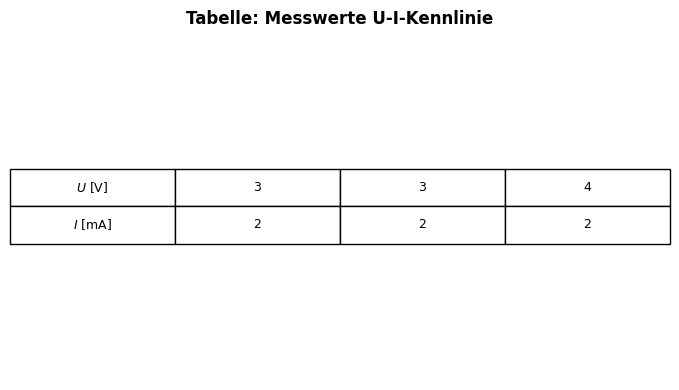

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Messdaten eingeben oder laden
u_1 = np.array([3.45, 3.78, 4.1], dtype=float)
i_1 = np.array([2, 2.1, 2.5], dtype=float)

# Tabelle erstellen
fig, ax = plt.subplots(figsize=(16, 4))
ax.axis("off")

# Erste Zeile: Header erstellen
col_labels = ["$U$ [V]"] + [f"{int(u)}" for u in u_1] # Die Abfolge iteriert alle Messwerte aus der Variable u_1

# Daten-Zeilen vorbereiten, hier können beliebig viele Zeilen hinzugefügt werden, benötigen jeweils eine eigene Variable (row2, row3 usw.)
row1 = ["$I$ [mA]"] + [f"{int(i)}" for i in i_1] # Die Abfolge iteriert alle Messwerte aus der Variable i_1

# Tabelle erstellen
table = ax.table(
    cellText=[row1], # Alle Zeilen, die in der Tabelle auftauchen sollen, müssen hier angegeben sein, mit Komma getrent und von einer eckigen Klammer umrahmt (z. B. cellText=[row1, row2, row3]
    colLabels=col_labels,
    cellLoc="center", # Hier wird angegeben, wie die Daten dargestellt werden sollen. Hier zentriert ("center"), linksbündig ("left") oder rechtsbündig ("right")
    loc="center", # Hier wird angegeben, wo die Tabelle auf der Seite angezeigt werden soll. s.o.
)

table.auto_set_font_size(False) # Dies ist wichtig, da sonst die Daten unter Umständen sehr klein skaliert und damit unlesbar werden.
table.set_fontsize(9) # Hier können Sie die Schriftgröße bestimmen
table.scale(2, 2) # Hier können Sie eine allgemeine Skalierung angeben, also Höhe x Breite im Verhältnis

plt.title("Tabelle: Messwerte U-I-Kennlinie", weight="bold") # Hier können Sie den Tabellentitel angeben. Über weight können Sie die Überschrift z.B. fett oder kursiv machen
plt.tight_layout()
plt.show() # Dieser Befehl erzeugt die Tabelle. Dies ist wichtig zu beachten, wenn Sie mehrere Tabellen auf einmal erstellen wollen.

Anstelle der Abfrage der Tabellen werden durch die Funktion
```python
col_labels = ["$U$ [V]"] + [f"{int(u)}" for u in u_1]
```
Können auch alle Werte explizit genannt werden. Dies kann für einige Aufgaben sinnvoll sein. Beachten Sie, dass der erste Wert eines Arrays in Python mit dem Index `[0]` aufgerufen wird, der zweite mit `[1]` usw. Wenn Sie explizit den letzten Wert eines Arrays benötigen, brauchen Sie nicht durchzählen, sondern können den Index `[-1]` verwenden.
Die oben stehende Tabelle könnte also auch gebildet werden durch das Argument:
```python
col_labels = ["$U$ [V]"] + [u_1[0], u_1[1], u_1[2]]
```
wie im folgenden Beispiel gezeigt:

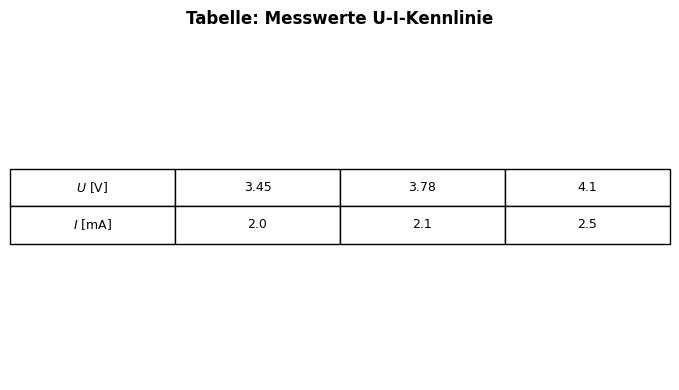

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Messdaten eingeben oder laden
u_1 = np.array([3.45, 3.78, 4.1], dtype=float)
i_1 = np.array([2, 2.1, 2.5], dtype=float)

# Tabelle erstellen
fig, ax = plt.subplots(figsize=(16, 4))
ax.axis("off")

# Erste Zeile: Header erstellen
col_labels = ["$U$ [V]"] + [u_1[0], u_1[1], u_1[2]] # Messwerte einzeln abgerufen durch Indizes

# Daten-Zeilen vorbereiten, hier können beliebig viele Zeilen hinzugefügt werden, benötigen jeweils eine eigene Variable (row2, row3 usw.)
row1 = ["$I$ [mA]"] + [i_1[0], i_1[1], i_1[-1]] # Messwerte einzeln abgerufen durch Indizes, hier mit [-1] als Index für den letzten Wert des Arrays

# Tabelle erstellen
table = ax.table(
    cellText=[row1], # Alle Zeilen, die in der Tabelle auftauchen sollen, müssen hier angegeben sein, mit Komma getrent und von einer eckigen Klammer umrahmt (z. B. cellText=[row1, row2, row3]
    colLabels=col_labels,
    cellLoc="center", # Hier wird angegeben, wie die Daten dargestellt werden sollen. Hier zentriert ("center"), linksbündig ("left") oder rechtsbündig ("right")
    loc="center", # Hier wird angegeben, wo die Tabelle auf der Seite angezeigt werden soll. s.o.
)

table.auto_set_font_size(False) # Dies ist wichtig, da sonst die Daten unter Umständen sehr klein skaliert und damit unlesbar werden.
table.set_fontsize(9) # Hier können Sie die Schriftgröße bestimmen
table.scale(2, 2) # Hier können Sie eine allgemeine Skalierung angeben, also Höhe x Breite im Verhältnis

plt.title("Tabelle: Messwerte U-I-Kennlinie", weight="bold") # Hier können Sie den Tabellentitel angeben. Über weight können Sie die Überschrift z.B. fett oder kursiv machen
plt.tight_layout()
plt.show() # Dieser Befehl erzeugt die Tabelle. Dies ist wichtig zu beachten, wenn Sie mehrere Tabellen auf einmal erstellen wollen.

---

## Erstellung von vertikalen Tabellen

Wenn Sie anstelle von horizontalen Tabellen nun vertikale Tabellen erstellen wollen (dies kann je nach Anwendungsfall sinnvoll sein), ist hier noch eine kurze Erläuterung, wie dies mit `matplotlib` ebenfalls möglich ist. Wir nutzen dieselben Daten von oben.

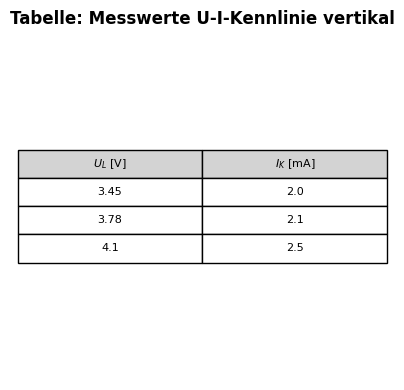

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Messdaten (unverändert)
u_1 = np.array([3.45, 3.78, 4.1], dtype=float) # in V
i_1 = np.array([2, 2.1, 2.5], dtype=float) # in mA

# Transponierte Darstellung (jede Zeile wird eine Spalte)
# Erste Zeile sind die Header
headers = ["$U_L$ [V]", "$I_K$ [mA]"]

# Daten für die Tabelle vorbereiten
table_data = []
for i in range(len(u_1)):
    table_data.append([u_1[i], 
                      i_1[i]])

# Diagramm erzeugen
fig, ax = plt.subplots(figsize=(4, 4))
ax.axis("off")

# Tabelle mit Headern
table = ax.table(
    cellText=table_data,
    colLabels=headers,
    cellLoc="center",
    loc="center",
    colColours=["lightgray"]*2
)

# Formatierung
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1.2, 1.5)

plt.title("Tabelle: Messwerte U-I-Kennlinie vertikal", weight="bold", pad=None)

plt.tight_layout()
plt.show()